#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import seaborn as sns
import re, string
import nltk
import time

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import SnowballStemmer
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

# EDA - All 5 datasets after Encryption

In [ ]:
df_list=['_r.csv','_a.csv','_f.csv','_fn.csv','_g.csv']
df_l=[]

In [ ]:
for i in range(len(df_list)):
  df= pd.read_csv('/content/drive/MyDrive/Phase 2 changes/encFile'+df_list[i])
  df_l.append(df)

In [ ]:
df_l[0].head()

,Liked,clean_text_r
0,1,488674104886 617574101610116803 18036617558591...
1,0,1014314639135362813978 258877410741013173
2,0,1397858596281397811275 13978168032105613978135...
3,1,62813978741018036 617558591397816803 148215859...
4,1,62816803617516803101431397810772741024121 1482...


In [ ]:
df_l[1].head()

,airline_sentiment,clean_text_a
0,1,1610110772146392588710772241215859148211680314...
1,2,1610110772146392588710772241215859148211680314...
2,1,1610110772146392588710772241215859148211680314...
3,0,1610110772146392588710772241215859148211680314...
4,0,1610110772146392588710772241215859148211680314...


In [ ]:
df_l[2].head()

,setiment,clean_text_f
0,1,5859101431014374101463913173 25887146395859241...
1,1,1397816803101434682241217410180367410617510772...
2,0,1077224121139781680314639241215859139781077274...
3,2,24121168034886 1803614639741013173135310143139...
4,2,5859101431014374101463913173 10143741014821180...


In [ ]:
df_l[3].head()

,Sentiment,clean_text_fn
0,2,2588716803741062874106175135313978107727410241...
1,0,1680362810772 617574104886 770724848 146391680...
2,2,6175585962813978 26631353585914639139781680314...
3,1,5859101431014374101463913173 21039107722412124...
4,1,62848861680313173107726284682 7707135311275741...


In [ ]:
df_l[4].head()

,labels,clean_text_g
0,1,101434682585913978258871803613978 741018036139...
1,2,139781463911275 139785859617524848 10143468258...
2,1,101434682585913978258871803613978 741018036139...
3,2,139784682146391077261756175 628468258591463916...
4,0,14821107722412113531397816803 5859258877410 74...


In [ ]:
r=df_l[0]['Liked'].value_counts()
print(r)

1    500
0    500
Name: Liked, dtype: int64


<Axes: ylabel='Liked'>

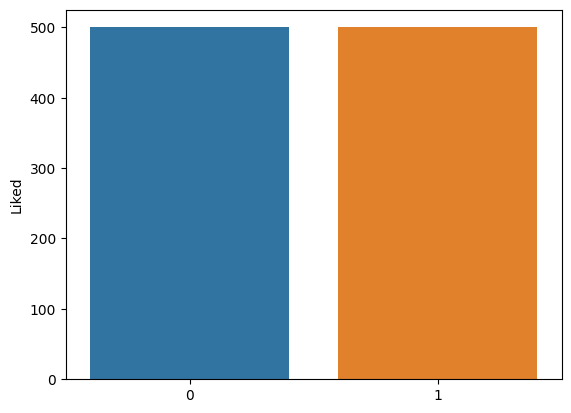

In [ ]:
sns.barplot(x=r.index,y=r)

# Processing the dataset

In [ ]:
def finalpreprocess(string):
    return (string)

In [ ]:
X_train_l=[]
X_test_l=[]
y_train_l=[]
y_test_l=[]
cn_text=['clean_text_r','clean_text_a','clean_text_f','clean_text_fn','clean_text_g']
cn_sent=['Liked','airline_sentiment','setiment','Sentiment','labels']

In [ ]:
df_l[0]

,Liked,clean_text_r
0,1,488674104886 617574101610116803 18036617558591...
1,0,1014314639135362813978 258877410741013173
2,0,1397858596281397811275 13978168032105613978135...
3,1,62813978741018036 617558591397816803 148215859...
4,1,62816803617516803101431397810772741024121 1482...
...,...,...
995,0,139784682107722412124848 210397410741013173 21...
996,0,585918036180361680313978107721397816803 107722...
997,0,7410161011680314639585961756175 10772148211803...
998,0,488646827410617516803 168032105618036168031463...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_l[0]['clean_text_r'],df_l[0]['Liked'],test_size=0.2,shuffle=True)

In [ ]:
for i in range(len(df_l)):
  df=df_l[i]
  ct=cn_text[i]
  cs=cn_sent[i]
  # print(ct,cs)
  X_train, X_test, y_train, y_test = train_test_split(df[str(ct)],df[str(cs)],test_size=0.2,shuffle=True)
  X_train_l.append(X_train)
  X_test_l.append(X_test)
  y_train_l.append(y_train)
  y_test_l.append(y_test)

In [ ]:
X_train_l[0]

756    488658591077213978 148211077224121135313978168...
817    62816803585962874102412158596175 2103914639135...
975    4682585918036180361680324121 24121168032105613...
199    4886741014639139784682 1317314639107721610116803 
926    7707585913173 6175741062816803 468216803585914...
                             ...                        
695    258877410 6175135324121101434682 6281680314639...
541    488658591077213978 139784682107721463913978112...
219                                 2412158591482116803 
407    210397410741013173 146391680358596175617511275...
227    210397410617524848 741013978139787410 58596175...
Name: clean_text_r, Length: 800, dtype: object

In [ ]:
tfidf_vectorizer_l=[]
X_train_vectors_tfidf_l=[]
X_test_vectors_tfidf_l=[]

In [ ]:
for i in range(len(df_l)):
  tfidf_vectorizer = TfidfVectorizer(use_idf=True)
  X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train_l[i].values.astype('U')) 
  X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test_l[i])
  tfidf_vectorizer_l.append(tfidf_vectorizer)
  X_train_vectors_tfidf_l.append(X_train_vectors_tfidf)
  X_test_vectors_tfidf_l.append(X_test_vectors_tfidf)

In [ ]:
names_ds=['Restaurant','Airlines','Financial','Financial_News','GPT']

#Classification of the encrypted text data

## Naive Bayes

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for i in range(len(df_l)):
  nb_tfidf = MultinomialNB()
  start = time.time()
  nb_tfidf.fit(X_train_vectors_tfidf_l[i], y_train_l[i]) 
  end = time.time() 
  #Predict y value for test dataset
  y_predict = nb_tfidf.predict(X_test_vectors_tfidf_l[i])
  y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf_l[i])[:,1]
  score_nb = round(accuracy_score(y_predict,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score is: " + str(score_nb)) 
  print(classification_report(y_test_l[i],y_predict))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], y_predict))

  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], y_predict, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], y_predict, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], y_predict, average='macro'))
  print("\n\n")
# print("The time of execution of above program is :",
#       (end-start) * 10**3, "ms")


------------------------
Restaurant dataset
------------------------
The accuracy score is: 77.5
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.78      0.77      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix: [[77 22]
 [23 78]]
f1 score  0.7749943748593715
precision   0.775
recall  0.7750275027502751



------------------------
Airlines dataset
------------------------
The accuracy score is: 62.0
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        42
           1       0.57      0.53      0.55        32
           2       0.65      0.50      0.57        26

    accuracy                           0.62       100
   macro avg       0.62      0.60      0.60       100
weighted avg       0.62      0.62      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(len(df_l)):
  max_accuracy = 0
  for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    start = time.time()
    rf.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
    end = time.time()
    Y_pred_rf = rf.predict(X_test_vectors_tfidf_l[i])
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test_l[i])*100,2)
    if(current_accuracy>max_accuracy): 
      max_accuracy = current_accuracy 
      best_x = x
  score_rf = round(accuracy_score (Y_pred_rf,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
  print(classification_report(y_test_l[i],Y_pred_rf))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], Y_pred_rf))

  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], Y_pred_rf, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], Y_pred_rf, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], Y_pred_rf, average='macro'))
  print("\n\n")

------------------------
Restaurant dataset
------------------------
The accuracy score achieved using Random Forest is: 73.5 %
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        99
           1       0.81      0.62      0.70       101

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200

Confusion Matrix: [[84 15]
 [38 63]]
f1 score  0.7320458050001264
precision   0.7481084489281211
recall  0.7361236123612361



------------------------
Airlines dataset
------------------------
The accuracy score achieved using Random Forest is: 64.0 %
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        42
           1       0.56      0.72      0.63        32
           2       0.59      0.50      0.54        26

    accuracy                           0.64       100
   macro avg       0

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
for i in range(len(df_l)):
  lr = LogisticRegression()
  start = time.time()
  lr.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
  end = time.time()
  Y_pred_lr = lr.predict(X_test_vectors_tfidf_l[i])
  y_prob = lr.predict_proba(X_test_vectors_tfidf_l[i])[:,1]
  score_lr = round(accuracy_score(Y_pred_lr,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score is: " + str(score_lr))
  print(classification_report(y_test_l[i],Y_pred_lr))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], Y_pred_lr))

  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], Y_pred_lr, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], Y_pred_lr, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], Y_pred_lr, average='macro'))
  print("\n\n")

------------------------
Restaurant dataset
------------------------
The accuracy score is: 78.0
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        99
           1       0.80      0.75      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix: [[80 19]
 [25 76]]
f1 score  0.7799119647859144
precision   0.780952380952381
recall  0.7802780278027803



------------------------
Airlines dataset
------------------------
The accuracy score is: 66.0
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        42
           1       0.60      0.66      0.63        32
           2       0.67      0.62      0.64        26

    accuracy                           0.66       100
   macro avg       0.66      0.65      0.66       100
weighted avg       0.66      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

------------------------
GPT dataset
------------------------
The accuracy score is: 59.78
              precision    recall  f1-score   support

           0       0.61      0.83      0.71        36
           1       0.69      0.29      0.41        31
           2       0.53      0.64      0.58        25

    accuracy                           0.60        92
   macro avg       0.61      0.59      0.57        92
weighted avg       0.62      0.60      0.57        92

Confusion Matrix: [[30  1  5]
 [13  9  9]
 [ 6  3 16]]
f1 score  0.5655971479500891
precision   0.6126286412000698
recall  0.5878853046594982





## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in range(len(df_l)):
  max_accuracy = 0
  for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    start = time.time() 
    dt.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
    end = time.time()
    Y_pred_dt = dt.predict(X_test_vectors_tfidf_l[i])
    current_accuracy = round(accuracy_score (Y_pred_dt,y_test_l[i])*100,2)
    if(current_accuracy>max_accuracy): 
      max_accuracy = current_accuracy 
      best_x = x
  dt = DecisionTreeClassifier(random_state=best_x)
  dt.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
  Y_pred_dt = dt.predict(X_test_vectors_tfidf_l[i])
  y_prob = dt.predict_proba(X_test_vectors_tfidf_l[i])[:,1]
  score_dt = round(accuracy_score (Y_pred_dt,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
  print(classification_report(y_test_l[i],Y_pred_dt))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], Y_pred_dt))

  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], Y_pred_dt, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], Y_pred_dt, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], Y_pred_dt, average='macro'))
  print("\n\n")

------------------------
Restaurant dataset
------------------------
The accuracy score achieved using Decision Tree is: 73.0 %
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        99
           1       0.76      0.68      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Confusion Matrix: [[77 22]
 [32 69]]
f1 score  0.7295673076923077
precision   0.732331888295191
recall  0.7304730473047305



------------------------
Airlines dataset
------------------------
The accuracy score achieved using Decision Tree is: 56.0 %
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        42
           1       0.50      0.62      0.56        32
           2       0.42      0.38      0.40        26

    accuracy                           0.56       100
   macro avg       0.

## SVM

In [ ]:
from sklearn import svm
for i in range(len(df_l)):
  sv=svm.SVC(kernel='linear')
  start = time.time()
  sv.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
  end = time.time()
  Y_pred_svm = sv.predict(X_test_vectors_tfidf_l[i]) 
  score_svm = round(accuracy_score(Y_pred_svm,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score is: " + str(score_svm))
  print(classification_report(y_test_l[i],Y_pred_svm))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], Y_pred_svm))


  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], Y_pred_svm, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], Y_pred_svm, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], Y_pred_svm, average='macro'))
  print("\n\n")

------------------------
Restaurant dataset
------------------------
The accuracy score is: 76.5
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.78      0.75      0.76       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion Matrix: [[77 22]
 [25 76]]
f1 score  0.7649941248531213
precision   0.7652060824329732
recall  0.7651265126512652



------------------------
Airlines dataset
------------------------
The accuracy score is: 65.0
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        42
           1       0.58      0.66      0.62        32
           2       0.64      0.62      0.63        26

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65     

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(len(df_l)):
  knn = KNeighborsClassifier(n_neighbors=7)
  start = time.time()
  knn.fit(X_train_vectors_tfidf_l[i],y_train_l[i])
  end = time.time()
  Y_pred_knn=knn.predict(X_test_vectors_tfidf_l[i])
  Y_pred_knn.shape
  score_knn = round(accuracy_score (Y_pred_knn,y_test_l[i])*100,2)
  print("------------------------")
  print(names_ds[i]+" dataset")
  print("------------------------")
  print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
  print(classification_report(y_test_l[i],Y_pred_knn))
  print('Confusion Matrix:',confusion_matrix(y_test_l[i], Y_pred_knn))
  from sklearn.metrics import f1_score
  print("f1 score ",f1_score(y_test_l[i], Y_pred_knn, average='macro'))
  from sklearn.metrics import precision_score
  print("precision  ",precision_score(y_test_l[i], Y_pred_knn, average='macro'))
  from sklearn.metrics import recall_score
  print("recall ",recall_score(y_test_l[i], Y_pred_knn, average='macro'))
  print("\n\n")

------------------------
Restaurant dataset
------------------------
The accuracy score achieved using KNN is: 72.0 %
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        99
           1       0.71      0.76      0.73       101

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

Confusion Matrix: [[67 32]
 [24 77]]
f1 score  0.7192982456140351
precision   0.7213428773061801
recall  0.7195719571957195



------------------------
Airlines dataset
------------------------
The accuracy score achieved using KNN is: 62.0 %
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        42
           1       0.64      0.50      0.56        32
           2       0.52      0.62      0.56        26

    accuracy                           0.62       100
   macro avg       0.61      0.61      0